## Predicting whether the cusomer's reviews are positive/negative using machine learning


#### 1. Problem Definition
In a statement,
The problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person feedbacks to predict that the reviews are positive/negative.

#### 2. Data
All of the dataset values were collected from customers who are visiting our hotel in the form of feedback.

#### 3. Evaluation
Evaluating a models predictions using problem-specific evaluation metrics

#### 4. Features
The following are the features we'll use to predict our target variable Is_Response.

Features:                    
1) User_ID:  unique id for each customer.                     
2) Description:  feedback customers are giving on the basis of the services provided to them.        
3) Browser_Used:  what browser customers are using to give their feedback.      
4) Device_Used:  what device customers are using.       

Label:       
1) Is_Response: Overall response  about the restaurant.



In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')
#nltk
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer, SnowballStemmer




## Data acquisition

In [2]:
# Reading the csv files
df_hotel_train =pd.read_csv("restraudent_train.csv")
df_hotel_train


,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


## Data Preprocessing 

In [3]:
# Display The head ==> To Check if Data is Properly Imported
df_hotel_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures/Columns : \n", df_hotel_train.columns)
print("\n\nNumber of Features/Columns : ", len(df_hotel_train.columns))
print("\nNumber of Rows : ",len(df_hotel_train))
print("\n\nData Types :\n", df_hotel_train.dtypes)
print("sum of duplicated values{}\n".format(df_hotel_train.duplicated().sum()))
print("\nContains NaN/Empty cells : ", df_hotel_train.isnull().values.any())
print("\nTotal empty cells by column :\n", df_hotel_train.isnull().sum(),"\n\n")


Features/Columns : 
 Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')


Number of Features/Columns :  5

Number of Rows :  38932


Data Types :
 User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
dtype: object
sum of duplicated values0


Contains NaN/Empty cells :  False

Total empty cells by column :
 User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64 




In [5]:
# Number of unique value in each features
for col in df_hotel_train.columns.values:
    print("number of unique valuse of {} : {}".format(col, df_hotel_train[col].nunique()))

number of unique valuse of User_ID : 38932
number of unique valuse of Description : 38932
number of unique valuse of Browser_Used : 11
number of unique valuse of Device_Used : 3
number of unique valuse of Is_Response : 2


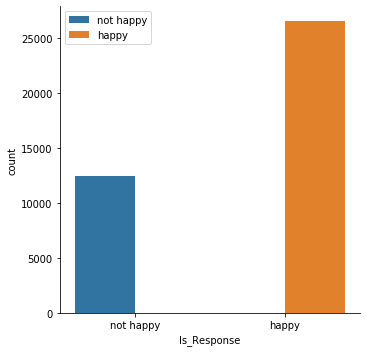

In [6]:
#Lets check the count of each class in target varaible
%matplotlib inline
sns.catplot(x='Is_Response',data=df_hotel_train,kind='count',hue='Is_Response')
plt.legend()

* Here we see data is unbalanced but all the classes have significant number of instances

In [7]:
#Deleting Unnnecessary Columns
df_hotel_train=df_hotel_train.drop(['User_ID','Browser_Used','Device_Used'],axis=1) #Dropping the column "User_ID", "Browser_Used","Device_Used"

In [8]:
# Return the wordnet object value corresponding to the POS tag
#Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#stemmer = SnowballStemmer("english")

def clean_text(text):
    # lower text
    text = text.lower()
    text = re.sub("[^\w\s]", " ", text) 
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #text=stemmer.stem(text)
    # remove words with only one letter
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
df_hotel_train["description_clean"] = df_hotel_train["Description"].apply(lambda x: clean_text(x))

### To clean textual data, call  custom 'clean_text' function that performs several transformations:

* lower the text
* tokenize the text (split the text into words) and remove the punctuation
* remove useless words that contain numbers
* remove useless stop words like 'the', 'a' ,'this','is' etc.
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet   lexical database
* lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

In [9]:
df_hotel_train

,Description,Is_Response,description_clean
0,The room was kind of clean but had a VERY stro...,not happy,room kind clean strong smell dog generally ave...
1,I stayed at the Crown Plaza April -- - April -...,not happy,stay crown plaza april april staff friendly at...
2,I booked this hotel through Hotwire at the low...,not happy,booked hotel hotwire low price could find got ...
3,Stayed here with husband and sons on the way t...,happy,stayed husband son way alaska cruise love hote...
4,My girlfriends and I stayed here to celebrate ...,not happy,girlfriend stay celebrate birthday plan weeken...
...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,arrive late night walk check area completely f...
38928,The only positive impression is location and p...,not happy,positive impression location public parking op...
38929,Traveling with friends for shopping and a show...,not happy,travel friend shop show location great best sa...
38930,The experience was just ok. We paid extra for ...,not happy,experience pay extra view pool get view palm t...


## Feature engineering

In [10]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df_hotel_train["sentiments"] = df_hotel_train["description_clean"].apply(lambda x: sid.polarity_scores(x))
df_hotel_train = pd.concat([df_hotel_train.drop(['sentiments'], axis=1), df_hotel_train['sentiments'].apply(pd.Series)], axis=1)


* Above adding sentiment analysis features  so I can guess that customers reviews are highly linked to how they felt about hotel. I use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores. For each text, Vader returns 4 values:

>> * a neutrality score
>> * a positivity score
>> * a negativity score
>> * an overall score that summarizes the previous scores
>> * integrate those 4 values as features in a dataset

In [11]:
df_hotel_train

,Description,Is_Response,description_clean,neg,neu,pos,compound
0,The room was kind of clean but had a VERY stro...,not happy,room kind clean strong smell dog generally ave...,0.000,0.490,0.510,0.9393
1,I stayed at the Crown Plaza April -- - April -...,not happy,stay crown plaza april april staff friendly at...,0.022,0.835,0.143,0.8957
2,I booked this hotel through Hotwire at the low...,not happy,booked hotel hotwire low price could find got ...,0.076,0.771,0.153,0.8860
3,Stayed here with husband and sons on the way t...,happy,stayed husband son way alaska cruise love hote...,0.020,0.506,0.474,0.9897
4,My girlfriends and I stayed here to celebrate ...,not happy,girlfriend stay celebrate birthday plan weeken...,0.062,0.762,0.176,0.9497
...,...,...,...,...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,arrive late night walk check area completely f...,0.086,0.621,0.293,0.9430
38928,The only positive impression is location and p...,not happy,positive impression location public parking op...,0.022,0.656,0.322,0.9565
38929,Traveling with friends for shopping and a show...,not happy,travel friend shop show location great best sa...,0.113,0.707,0.181,0.7780
38930,The experience was just ok. We paid extra for ...,not happy,experience pay extra view pool get view palm t...,0.108,0.717,0.175,0.5574


In [12]:
# Add number of characters column
df_hotel_train["nb_chars"] = df_hotel_train["description_clean"].apply(lambda x: len(x))

# Add number of words column
df_hotel_train["nb_words"] = df_hotel_train["description_clean"].apply(lambda x: len(x.split(" ")))

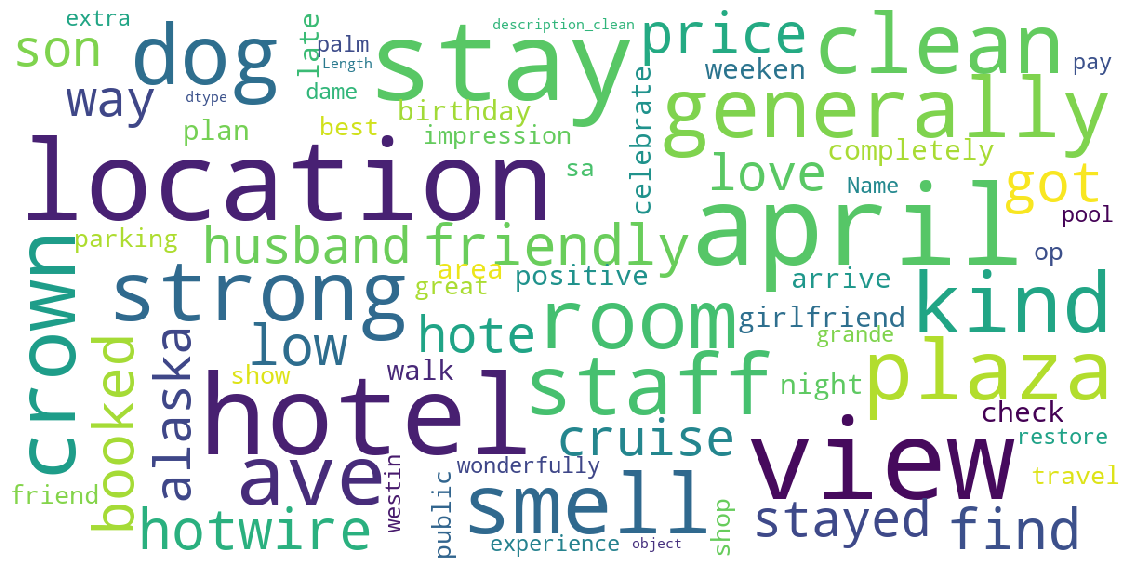

In [13]:
# wordcloud function
#!pip install WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df_hotel_train["description_clean"])

* Getting sense of loud words in train dataset
* Most of the words are indeed related to the hotels: location, room, staff, etc. Some words are more related to the customer experience with the hotel stay: price, smell, wonderfully, clean,love etc

In [14]:
# Highest positive sentiment reviews (with more than 5 words)
df_hotel_train[df_hotel_train["nb_words"] >= 5].sort_values("pos", ascending = False)[["description_clean", "pos"]].head()

,description_clean,pos
5568,nice clean calm friendly superb\ncan recommend...,0.953
1959,well room definitely nice breakfast good yeah,0.864
38285,friendly helpful staff awesome room clean easy...,0.861
12684,staff helpful friendly room clean comfortable,0.857
23693,nice hotel comfortable clean enjoy stay,0.857


In [15]:
# Highest negative sentiment reviews (with more than 5 words)
df_hotel_train[df_hotel_train["nb_words"] >= 5].sort_values("neg", ascending = False)[["description_clean", "neg"]].head(10)

,description_clean,neg
15681,stay doubt stay ramadas disappointed carpet dirty,0.680
32913,dirty smelly expensive awful awful awful put c...,0.634
19046,clean staff unprofessional upsetting awkward h...,0.630
23296,terrible place service bad hotel staff rude le...,0.586
34424,rude crew\n clean\n horrible bed,0.580
37652,complain would pay night park,0.565
31258,hot water room small noisy uncomfortable,0.518
6714,would recommend hotel bad enemy staff lack pro...,0.496
38739,hotel bad check horrible young girl check slow...,0.491
23242,beware place old dirty walk carpet sock black ...,0.488


In [16]:
# lets Map "happy" to 1 and "not happy" to 0
df_hotel_train["Is_Response"] = df_hotel_train["Is_Response"].map({"happy": 1, "not happy" : 0})
df_hotel_train.sample(3)

,Description,Is_Response,description_clean,neg,neu,pos,compound,nb_chars,nb_words
7425,I Chose this hotel mainly because of its revie...,0,chose hotel mainly review surprised super rat ...,0.023,0.589,0.387,0.9941,701,100
36932,This was our -th trip to NYC and I am always l...,0,trip nyc always look good deal hotel without g...,0.072,0.572,0.356,0.9857,586,92
25368,absolutely a wonderful place to stay with or w...,1,absolutely wonderful place stay without child ...,0.000,0.610,0.390,0.9152,175,24


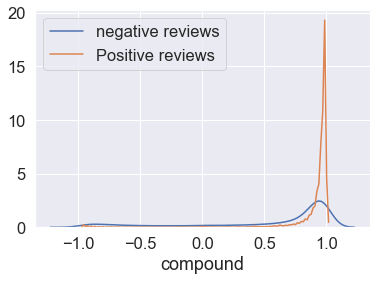

In [72]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df_hotel_train[df_hotel_train['Is_Response'] == x]
    
    # Draw the density plot
    if x == 1:
        label = "Positive reviews"
    else:
        label = "negative reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

* The above graph shows the distribution of the reviews sentiments among positive reviews and negative ones. We can see that positive reviews are for most of them considered. On the contrary, negative reviews tend to have lower compound sentiment scores.


In [28]:
# Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df =4)# min_df is used for removing terms that appear too infrequently
x = tfidf.fit_transform(df_hotel_train['description_clean'])

x

<38932x13399 sparse matrix of type '<class 'numpy.float64'>'
	with 2406216 stored elements in Compressed Sparse Row format>

In [29]:
# checking the shape
print(x.shape)

# maing the dependent variable column
y = df_hotel_train['Is_Response'].values
print(y.shape)

(38932, 13399)
(38932,)


In [30]:

#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** Random Forest *****************************


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Max Accuracy Score corresponding to Random State  50 is: 0.8457685886734301


Learning Score :  1.0
Accuracy Score :  0.8425581096699628
Cross Val Score :  0.8914347155436596
roc auc score :  0.7725321086564072


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.58      0.70      2482
           1       0.83      0.

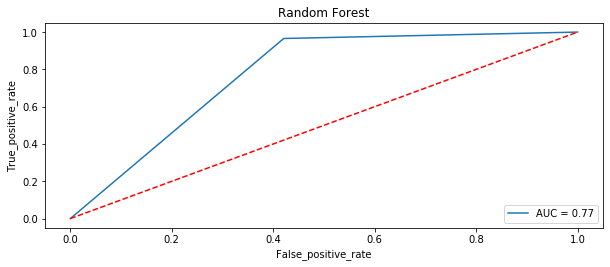

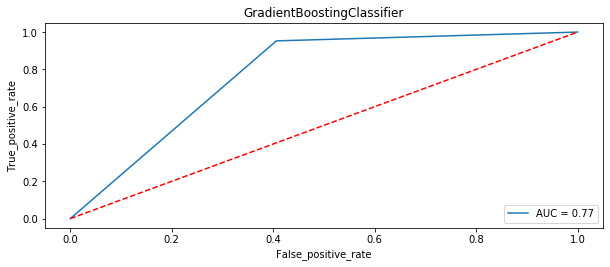

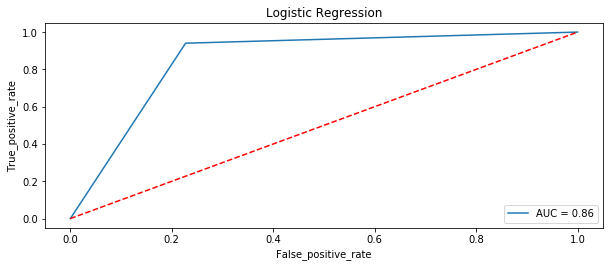

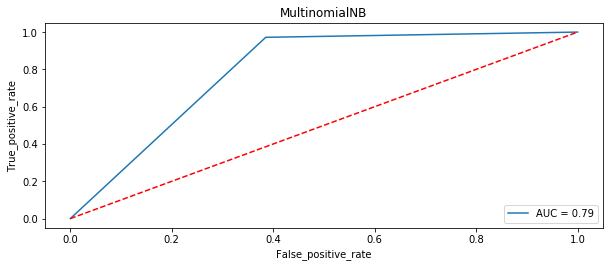

In [31]:
#Lists to store model name, Accuracy score, cross_val_score, Auc Roc score 
models =[]
models.append(("Random Forest",RandomForestClassifier()))
models.append(("GradientBoostingClassifier",GradientBoostingClassifier()))    
models.append(("Logistic Regression",LogisticRegression()))
models.append(('MultinomialNB',MultinomialNB()))

#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='f1').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [32]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,Random Forest,100,84.2558,89.1435,77.2532
1,GradientBoostingClassifier,84.4309,83.8449,88.3649,77.3375
2,Logistic Regression,90.4158,88.6991,91.4986,85.6599
3,MultinomialNB,86.3285,85.8097,89.9816,79.337


* From above results we can say Logistic Regression and MultinomialNB performing well .Lets tune a models with GridRearchCV 

In [33]:
#Define a function to calculate accuracy,precision,recall and f1 score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

## Tuning a model with GridSearchCV

In [34]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5,verbose=1,refit=True,n_jobs=-1)
    clf.fit(x,y)
    print(clf.best_params_)
    print(clf.best_score_)

In [35]:
#.........Grid Search for LogisticRegression......
lg=LogisticRegression()
parameters={"C": np.logspace(-4, 4, 20),"solver": ["liblinear"],'penalty' : ['l1', 'l2']}
grid_cv(lg,parameters,'f1')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.9min finished


{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}
0.9138873093709838


In [52]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfl = LogisticRegression(C= 1.623776739188721, solver='liblinear',penalty= 'l2')
max_acc_score(clfl,x,y)

Max Accuracy Score corresponding to Random State  98 is: 0.8855785283164248




98

In [36]:
#.........Grid Search for MultinomialNB......
mnb=MultinomialNB()
parameters = {  
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid_cv(mnb,parameters,'f1')


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:    0.1s remaining:    0.6s


{'alpha': 0.1}
0.9022101147470961


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.5s finished


In [42]:
#checking accuracy score using best parameters which calculated from gridsearchCV
clfR = MultinomialNB(alpha=0.1)
max_acc_score(clfR,x,y)

Max Accuracy Score corresponding to Random State  51 is: 0.8659303968152048




51

## Cross Validation  with best parameters using GridSearchCV

In [44]:
# Cross-validated F1 score 
cv_MultinomialNB = np.mean(cross_val_score(clfR,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_MultinomialNB

0.9022101147470961

In [47]:
cv_LogisticRegression = np.mean(cross_val_score(clfl,
                                x,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_LogisticRegression

0.9138873093709838

## train_test_split  with best parameters using GridSearchCV

In [55]:
#lets make our LogisticRegression as final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 98,test_size=0.20,stratify=y)
lg = LogisticRegression(C= 1.623776739188721, solver='liblinear',penalty= 'l2')
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
evaluate_preds(y_test,predlg)

Acc: 88.56%
Precision: 0.90
Recall: 0.94
F1 score: 0.92


{'accuracy': 0.89, 'precision': 0.9, 'recall': 0.94, 'f1': 0.92}

In [54]:
#lets make our MultinomialNB as final model
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 51,test_size=0.20,stratify=y)
mnb = MultinomialNB(alpha=0.1)
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
evaluate_preds(y_test,predmnb)

Acc: 86.59%
Precision: 0.87
Recall: 0.95
F1 score: 0.91


{'accuracy': 0.87, 'precision': 0.87, 'recall': 0.95, 'f1': 0.91}

* From above results we can conclude that with train_test_test getting better results as compared to cross validation.

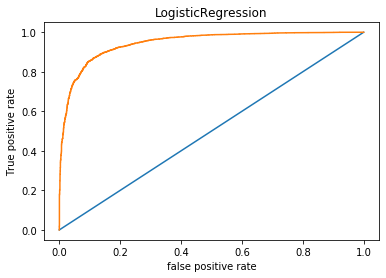

roc_auc_score =  0.9459265239412745


In [50]:
# Make predictions with probabilities
y_probs = lg.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

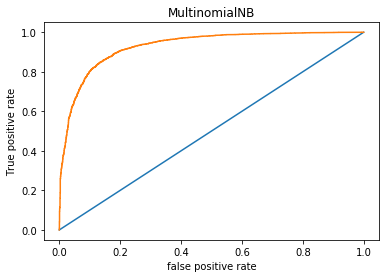

roc_auc_score =  0.9293833603832609


In [51]:
# Make predictions with probabilities
y_probs = mnb.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('MultinomialNB')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

# From above results we can conclude that Logistic Regression performing well as compared to other models considering below results :

>> * Accuracy Score: 88.56%
>> * Precision: 0.90
>> * Recall: 0.94
>> * F1 score: 0.92
>> * roc_auc_score : 0.92

[[1913  569]
 [ 322 4983]]


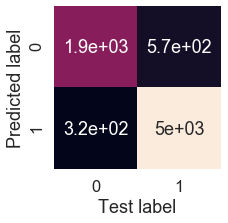

In [59]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, predlg):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, predlg),
                     annot=True,
                     cbar=False)
    plt.xlabel("Test label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, predlg)
#lets printed confusion_matrix
print(confusion_matrix(y_test, predlg))

In [60]:
# Printing predicted values 
test=pd.DataFrame(data=y_test,)
test['Predicted values']=predlg
test
# On the lest side values are those fields which are taken by machine for test...

,0,Predicted values
0,1,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
7782,0,0
7783,1,1
7784,1,1
7785,1,1


In [121]:
#lets save the model using joblib
from sklearn.externals import joblib
joblib.dump(lg,'Project1_hotel_reviews.pkl')

['Project1_hotel_reviews.pkl']

In [122]:
#read the file using joblib
lg_from_joblib=joblib.load('Project1_hotel_reviews.pkl')
joblib_y_preds = lg_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 88.56%
Precision: 0.90
Recall: 0.94
F1 score: 0.92


{'accuracy': 0.89, 'precision': 0.9, 'recall': 0.94, 'f1': 0.92}

## Lets Predict Test Data Set


In [89]:
hotel_test=pd.read_csv("restraudent_test.csv")
hotel_test


,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile
...,...,...,...,...
29399,id109531,I stayed at the hotel and towers for a confere...,Chrome,Mobile
29400,id109532,Trying to stay within the Marriott family and ...,Internet Explorer,Tablet
29401,id109533,"We stayed for - nights with our little dog,ver...",Edge,Desktop
29402,id109534,Stayed at the Yotel over the weekend and was v...,InternetExplorer,Desktop


In [90]:
# Deleting Unnnecessary Columns
hotel_test=hotel_test.drop(['User_ID','Browser_Used','Device_Used'],axis=1) #Dropping the column "User_ID", "Browser_Used","Device_Used"

In [91]:
# Lets clean the test using clean_text() function
hotel_test["Description"] = hotel_test["Description"].apply(lambda x: clean_text(x))

In [106]:
hotel_test

,Description
0,look motel close proximity tap phil show chose...
1,walk distance madison square garden penn subwa...
2,visit seattle business spend night vintage par...
3,hotel location excellent room clean suite one ...
4,hotel awesome love service anthony really grea...
...,...
29399,stayed hotel tower conference love place room ...
29400,try stay within marriott family want pay park ...
29401,stay night little dog friendly staff ask sever...
29402,stayed yotel weekend impressed thing like best...


In [118]:
# lets converts words into vectors
tfidf = TfidfVectorizer(min_df=3,max_features=13399)
test_x = tfidf.fit_transform(hotel_test["Description"])

test_x

<29404x13399 sparse matrix of type '<class 'numpy.float64'>'
	with 1820888 stored elements in Compressed Sparse Row format>

* As I train the model using 13399 features so i had taken max_features equal to 13399 otherwise it throws an error

In [119]:
# lets predict our test dataset
review_pred=lg.predict(test_x)
review_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [120]:
# Saving the Predicted values in csv file
df1=pd.DataFrame(review_pred)
df1.to_csv('Project1_hotel_reviews.csv',index=False)

In [123]:
#change the name of a dataframe(df1)
df1.columns = ['review_pred']
df1

,review_pred
0,1
1,0
2,1
3,1
4,1
...,...
29399,0
29400,1
29401,1
29402,1


In [129]:
df1['review_pred'].value_counts()

1    16515
0    12889
Name: review_pred, dtype: int64

In [125]:
# add sentiment anaylsis columns to visualize positive and negative sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df1["sentiments"] = hotel_test["Description"].apply(lambda x: sid.polarity_scores(x))
df1 = pd.concat([df1.drop(['sentiments'], axis=1), df1['sentiments'].apply(pd.Series)], axis=1)


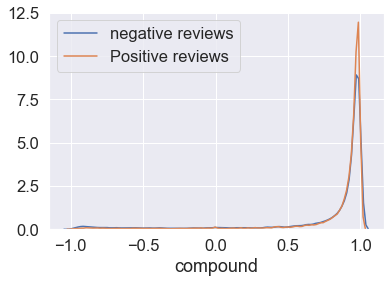

In [126]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df1[df1['review_pred'] == x]
    
    # Draw the density plot
    if x == 1:
        label = "Positive reviews"
    else:
        label = "negative reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

* From above visualization I can conclude that negative reviews are increased as compared to previous reviews(train dataset) 

# Conclusion :

>> 1) Logistic Regression is providing better f1 score,accuracy ,precision,recall and auc_roc score as compared to other          models.

>> 2) Positive reviews are more as compaed to negative reviews but it  decreased alot as compared previous train dataset.So        hotel owner have to take necessary steps to improve their service and get back trust of peoples.

>> 3) Logistic Regression reduces the False Positive that is Type 1 Error
